In [5]:
#pip install opencv-python
#pip install imghdr
#pip install tensorflow


In [6]:
import tensorflow as tf
import os

In [8]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [9]:
tf.config.list_physical_devices('GPU')

[]

In [10]:
import imghdr
import cv2

In [11]:
data_dir = 'Clothing' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [12]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
data = tf.keras.utils.image_dataset_from_directory('Clothing')

Found 932 files belonging to 6 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
batch = data_iterator.next()

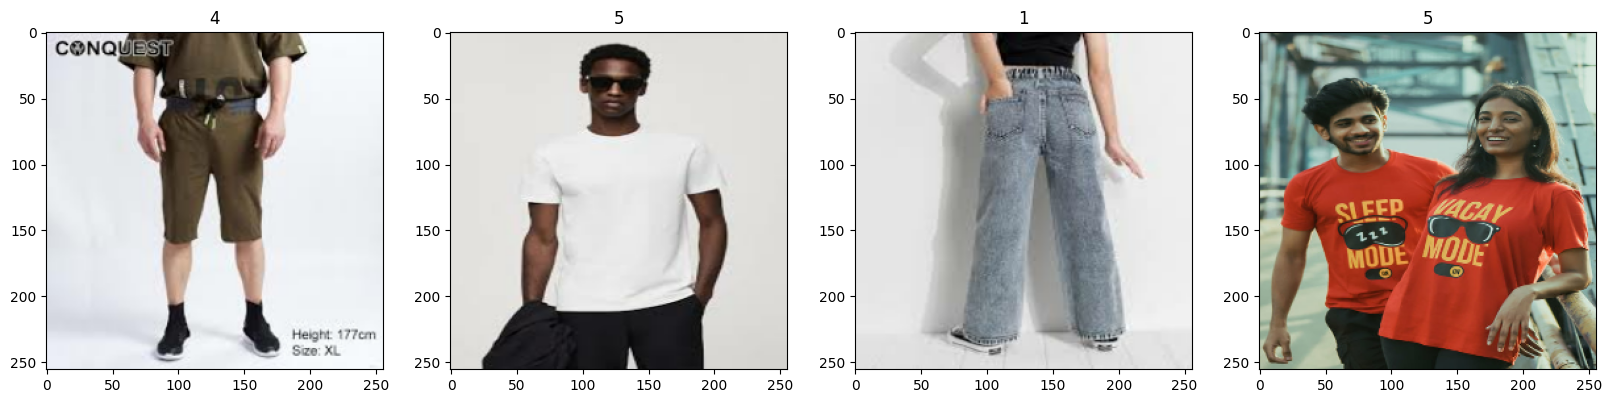

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [18]:
data = data.map(lambda x,y: (x/255, y))

In [19]:
data.as_numpy_iterator().next()

(array([[[[0.78039217, 0.7294118 , 0.69411767],
          [0.7836014 , 0.732621  , 0.6973269 ],
          [0.78431374, 0.73333335, 0.69803923],
          ...,
          [0.8105775 , 0.76744026, 0.74391085],
          [0.80784315, 0.7647059 , 0.7411765 ],
          [0.80784315, 0.7647059 , 0.7411765 ]],
 
         [[0.78039217, 0.7294118 , 0.69411767],
          [0.7836014 , 0.732621  , 0.6973269 ],
          [0.78431374, 0.73333335, 0.69803923],
          ...,
          [0.8105775 , 0.76744026, 0.74391085],
          [0.80784315, 0.7647059 , 0.7411765 ],
          [0.80784315, 0.7647059 , 0.7411765 ]],
 
         [[0.78039217, 0.7294118 , 0.69411767],
          [0.7836014 , 0.732621  , 0.6973269 ],
          [0.78431374, 0.73333335, 0.69803923],
          ...,
          [0.8105775 , 0.76744026, 0.74391085],
          [0.8083398 , 0.7652025 , 0.7416731 ],
          [0.8105775 , 0.76744026, 0.74391085]],
 
         ...,
 
         [[0.78039217, 0.7294118 , 0.69411767],
          [0.78360

In [20]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [21]:
train_size

21

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [23]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [29]:
logdir='logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
21/21 [==============================] - 17s 712ms/step - loss: -3584.0613 - accuracy: 0.1473 - val_loss: -18839.5293 - val_accuracy: 0.1927
Epoch 2/20
21/21 [==============================] - 15s 659ms/step - loss: -208013.5312 - accuracy: 0.1473 - val_loss: -714468.0000 - val_accuracy: 0.1667
Epoch 3/20
21/21 [==============================] - 16s 716ms/step - loss: -3153340.0000 - accuracy: 0.1637 - val_loss: -9293955.0000 - val_accuracy: 0.1979
Epoch 4/20
21/21 [==============================] - 15s 680ms/step - loss: -26075268.0000 - accuracy: 0.1592 - val_loss: -55573168.0000 - val_accuracy: 0.1875
Epoch 5/20
21/21 [==============================] - 16s 716ms/step - loss: -136749920.0000 - accuracy: 0.1429 - val_loss: -244702544.0000 - val_accuracy: 0.1354
Epoch 6/20
21/21 [==============================] - 17s 752ms/step - loss: -506148512.0000 - accuracy: 0.1533 - val_loss: -823390400.0000 - val_accuracy: 0.1406
Epoch 7/20
21/21 [==============================] - 16s

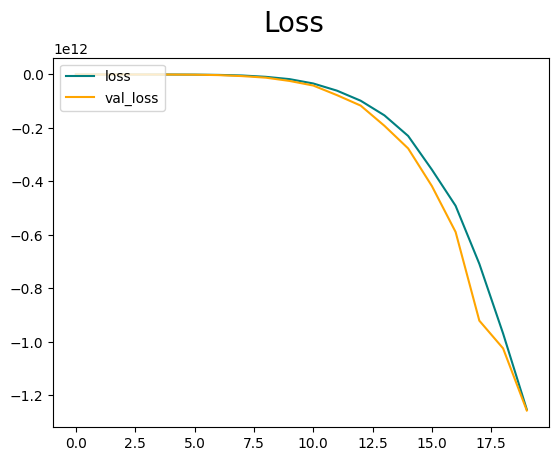

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

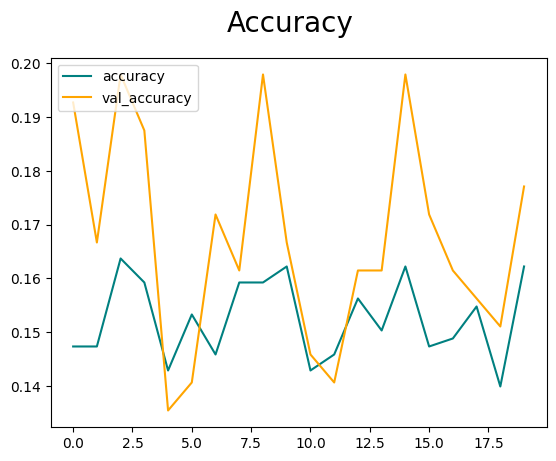

In [33]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [34]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [35]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [36]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 96ms/step


In [37]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.8088235, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.13235295, shape=(), dtype=float32)
